In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("data/diabetes.csv")

In [7]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [16]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250627)

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression(random_state=20250627, max_iter=1000)

In [23]:
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,20250627
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred = logreg.predict(X_test)

In [25]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.7728119180633147, 0.7445887445887446)

### PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(random_state=20250627)

In [29]:
pca.fit(X_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,20250627


In [33]:
X.shape[1]

8

In [30]:
print(pca.components_)

[[-1.48165357e-03  1.09706282e-01  1.63578347e-02  6.13290429e-02
   9.91838199e-01  1.37928307e-02  4.96198902e-04  6.37155707e-05]
 [ 2.20935266e-02  9.75287570e-01  1.17438349e-01 -5.53262421e-02
  -1.06986203e-01  4.44841043e-02  1.03141205e-03  1.34340334e-01]
 [ 2.28869843e-02 -1.21362002e-01  9.21242806e-01  3.14551361e-01
  -2.30066206e-02  1.30290400e-01  5.28425512e-04  1.40040751e-01]
 [-5.53664530e-02  1.07899901e-01 -2.73779006e-01  8.92781321e-01
  -6.51652942e-02  1.78032356e-01  2.52545595e-03 -2.78083303e-01]
 [ 1.67470440e-01 -9.12613257e-02 -2.40145373e-01  2.26606535e-01
  -3.77570959e-04  4.39062519e-02  1.67864401e-03  9.23403477e-01]
 [ 1.28565846e-02 -4.54650053e-02 -6.79843054e-02 -2.13889420e-01
   5.86208239e-03  9.73151816e-01  1.94475589e-03 -1.82890479e-02]
 [ 9.83713312e-01  3.29253689e-03  2.31338933e-03  8.49206665e-03
   7.52844901e-04 -1.41718414e-02 -4.38308775e-03 -1.78883183e-01]
 [ 4.11132417e-03 -1.01269717e-03  6.20846297e-04 -2.32151084e-03
  -

In [34]:
print(pca.n_components_)

8


In [35]:
import matplotlib.pyplot as plt

In [36]:
features = [f"PC{i+1}" for i in range(pca.n_components_)]

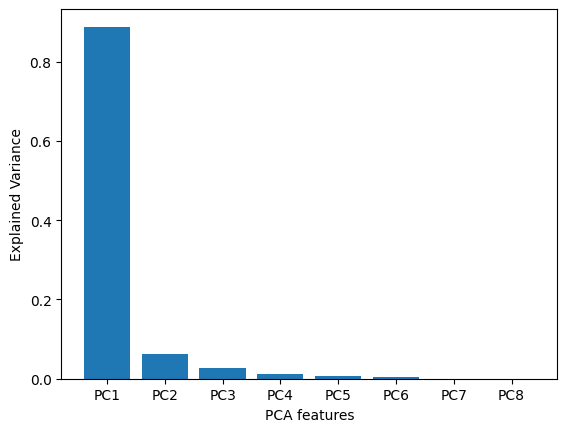

In [38]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel("Explained Variance")
plt.xlabel("PCA features")
plt.show()

In [42]:
pca = PCA(random_state=20250627, n_components=6)
pca.fit(X_train)
pca.n_components_ # Reducción de dimensiones a 6 componentes principales

6

In [43]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [44]:
logreg = LogisticRegression(random_state=20250627, max_iter=1000)
logreg.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,20250627
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
logreg.score(X_train_pca, y_train), logreg.score(X_test_pca, y_test)

(0.7728119180633147, 0.7359307359307359)